In [ ]:
!pip install squarify


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import squarify

In [ ]:
# Load datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [ ]:
# Preview the first few rows
customers.head()

# Get dataset information
customers.info()

# Check for missing values
customers.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [ ]:
# Preview the first few rows
products.head()

# Get dataset information
products.info()

# Check for missing values
products.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


,0
ProductID,0
ProductName,0
Category,0
Price,0


In [ ]:
# Preview the first few rows
transactions.head()

# Get dataset information
transactions.info()

# Check for missing values
transactions.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [ ]:
# Data cleaning
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [ ]:
# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

In [ ]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
merged_data.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000,1000,1000,1000,1000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN,199,4,178,66,4,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN,Abigail Jones,South America,2022-04-16,ActiveWear Smartwatch,Books,NaN
freq,1,11,19,1,NaN,NaN,NaN,11,304,19,40,270,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407,NaN,NaN,NaN,NaN,NaN,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639,NaN,NaN,NaN,NaN,NaN,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000,NaN,NaN,NaN,NaN,NaN,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000,NaN,NaN,NaN,NaN,NaN,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000,NaN,NaN,NaN,NaN,NaN,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000,NaN,NaN,NaN,NaN,NaN,404.40000


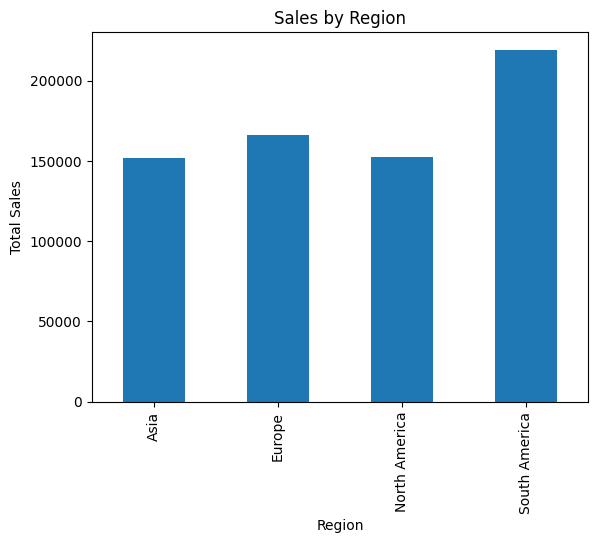

In [ ]:
# Perform analysis
# Example: Regional distribution
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

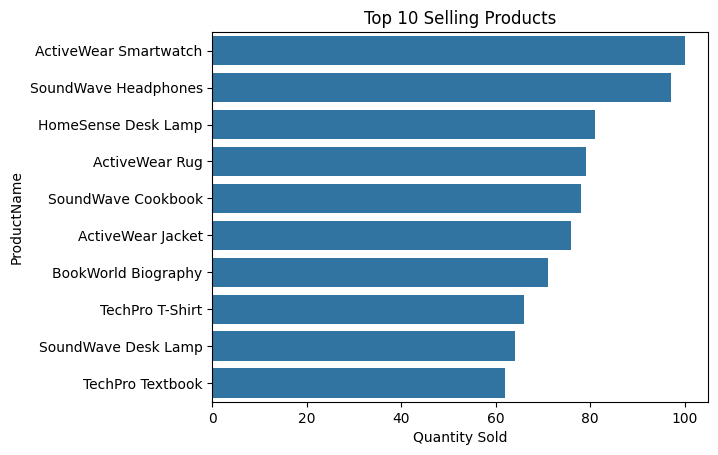

In [ ]:
# Example: Top-selling products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.show()

**Customer Analysis**

<ipython-input-13-3ac943fb419f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', order=customer_region_counts.index, palette='viridis')


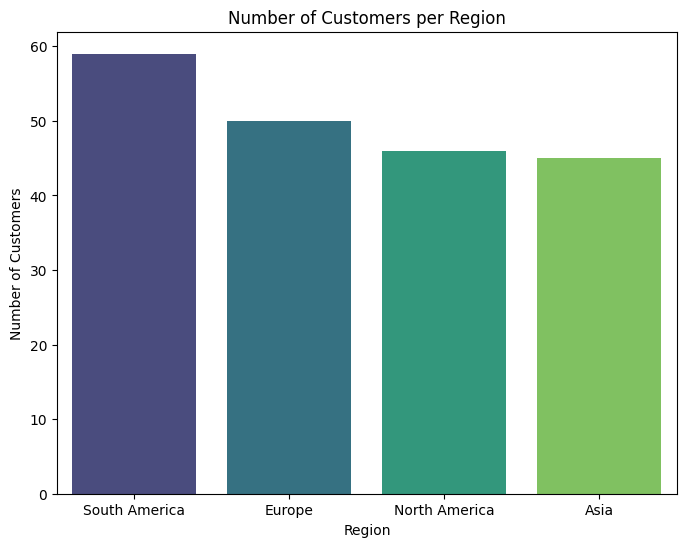

In [ ]:
# Count of customers per region
customer_region_counts = customers['Region'].value_counts()

# Plot
plt.figure(figsize=(8,6))
sns.countplot(data=customers, x='Region', order=customer_region_counts.index, palette='viridis')
plt.title('Number of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


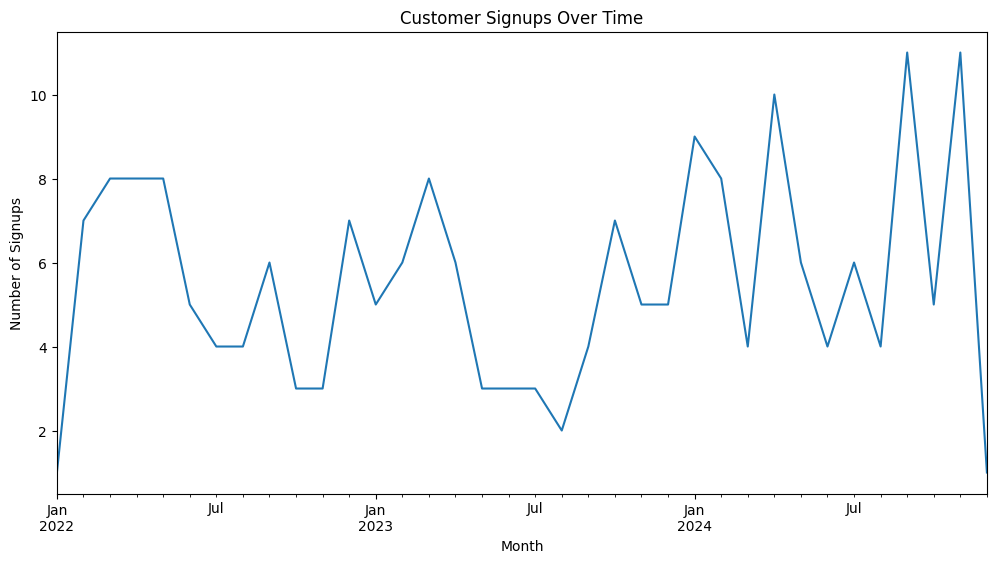

In [ ]:
# Customer signups per month
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signups_per_month = customers.groupby('SignupMonth').size()

# Plot
signups_per_month.plot(kind='line', figsize=(12,6))
plt.title('Customer Signups Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()


**Product Analysis**

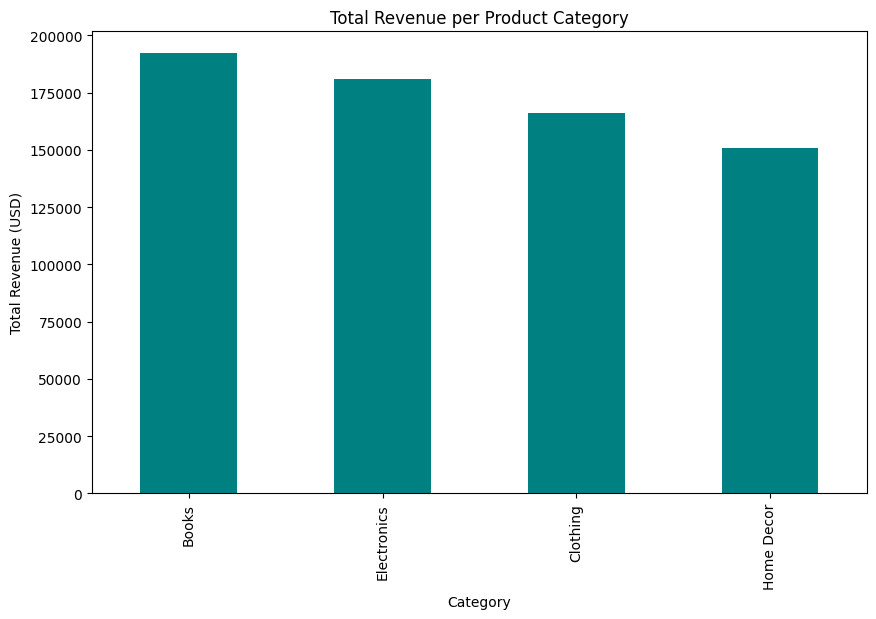

In [ ]:
# Total revenue per category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
category_revenue.plot(kind='bar', color='teal')
plt.title('Total Revenue per Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.show()


<ipython-input-20-9b6c90272308>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=products, x='Category', y='Price', palette='Set2')


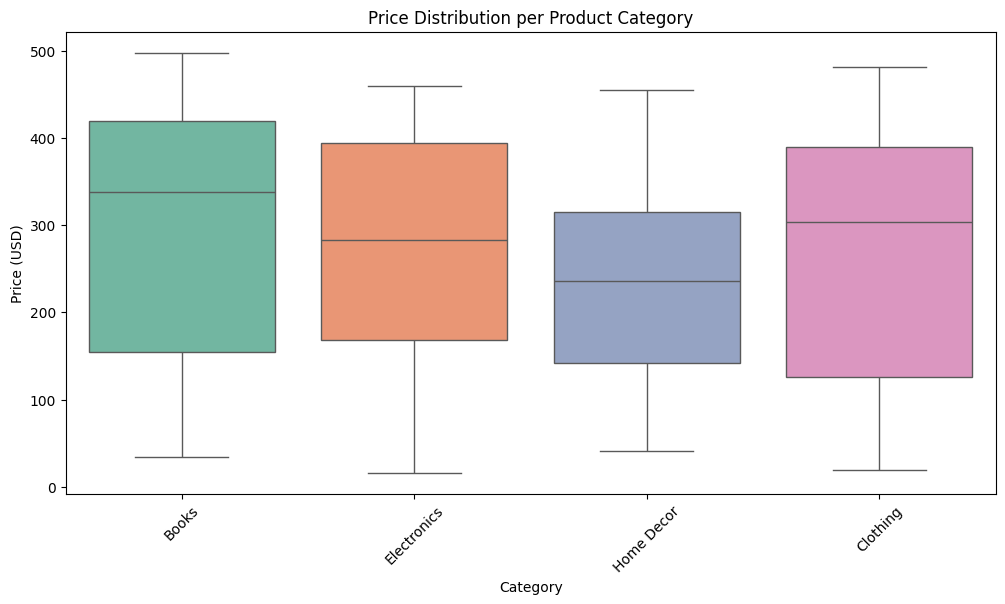

In [ ]:
# Boxplot of prices per category
plt.figure(figsize=(12,6))
sns.boxplot(data=products, x='Category', y='Price', palette='Set2')
plt.title('Price Distribution per Product Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-22-9c20ff2872cf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Quantity', y='ProductName', palette='pastel')


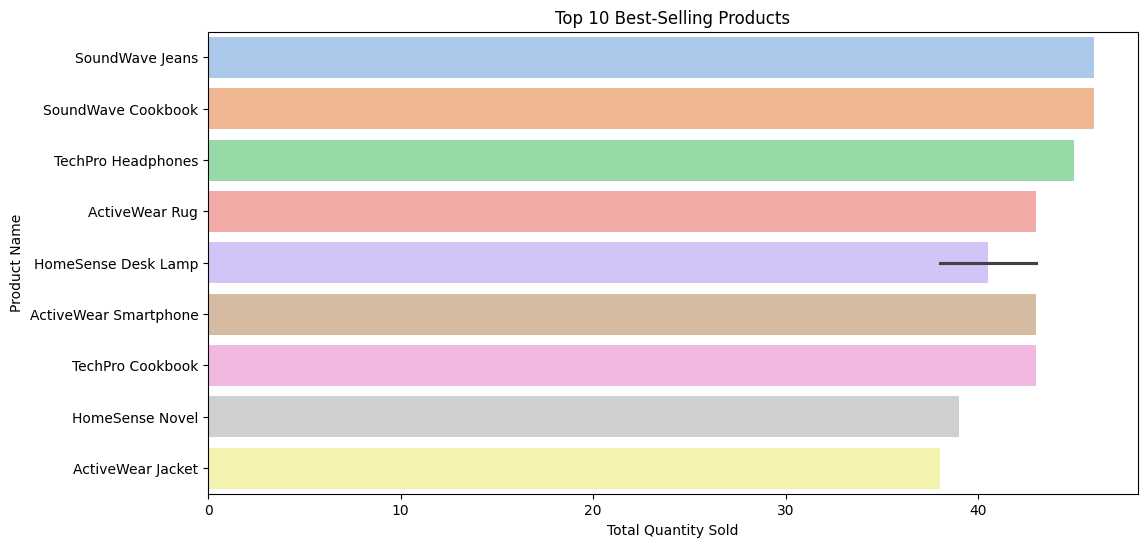

In [ ]:
# Total quantity sold per product
product_sales = merged_data.groupby(['ProductID', 'ProductName'])['Quantity'].sum().reset_index()
top_products = product_sales.sort_values('Quantity', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='Quantity', y='ProductName', palette='pastel')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.show()


**Transaction Analysis**

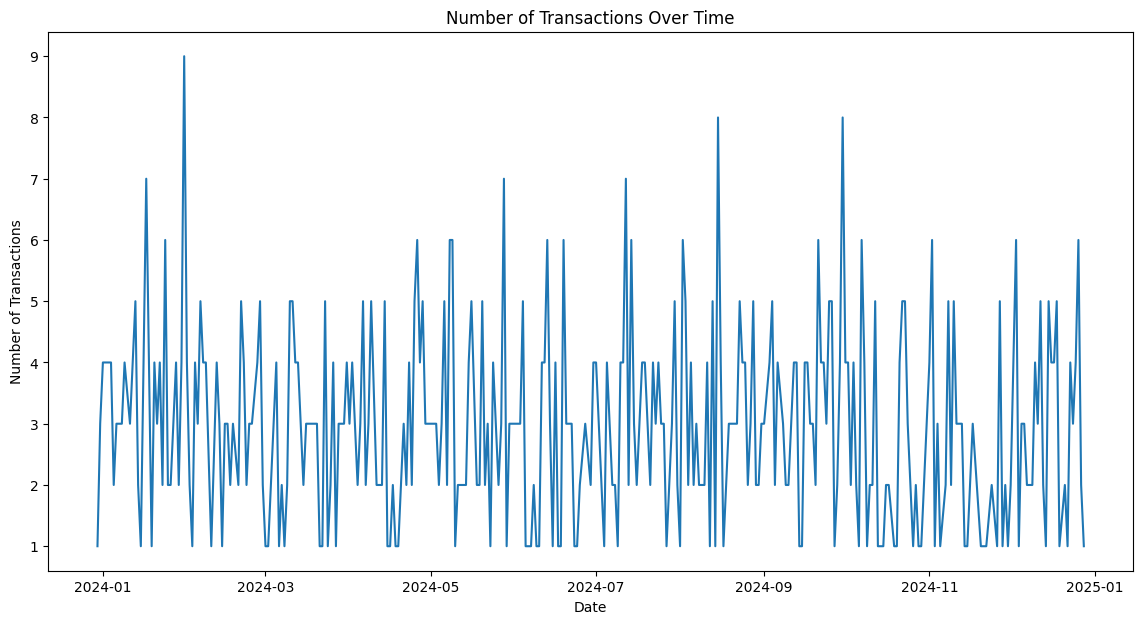

In [ ]:
# Transactions per day
transactions_per_day = merged_data.groupby(merged_data['TransactionDate'].dt.date)['TransactionID'].count()

# Plot
plt.figure(figsize=(14,7))
transactions_per_day.plot(kind='line')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


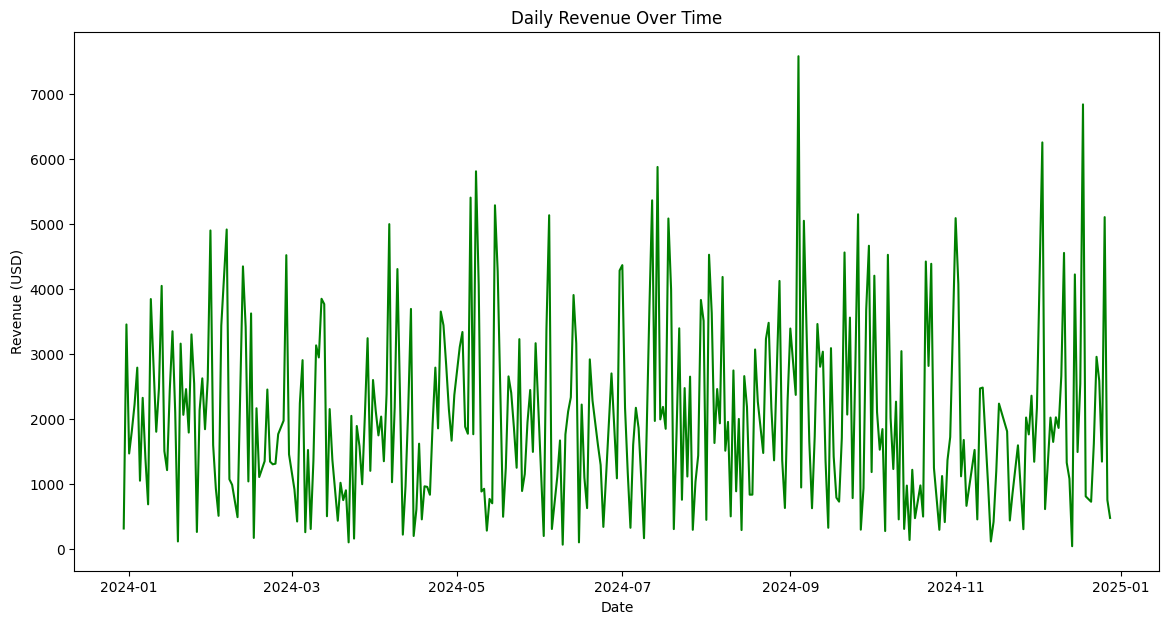

In [ ]:
# Revenue per day
revenue_per_day = merged_data.groupby(merged_data['TransactionDate'].dt.date)['TotalValue'].sum()

# Plot
plt.figure(figsize=(14,7))
revenue_per_day.plot(kind='line', color='green')
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.show()


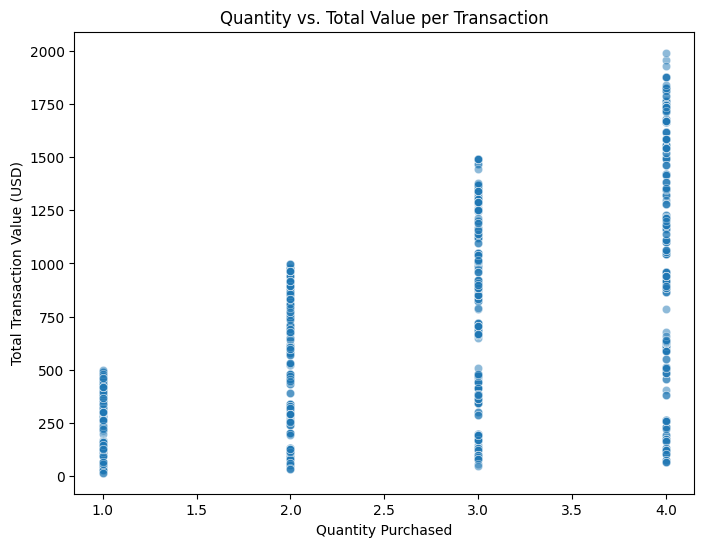

In [ ]:
# Scatter plot of Quantity vs TotalValue
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_data, x='Quantity', y='TotalValue', alpha=0.5)
plt.title('Quantity vs. Total Value per Transaction')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Transaction Value (USD)')
plt.show()


**Regional Analysis**

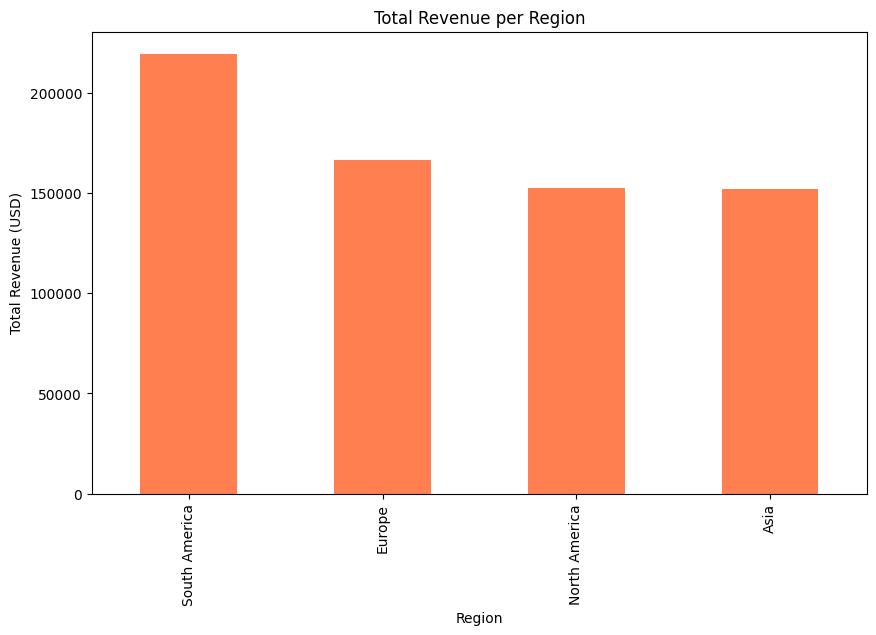

In [ ]:
# Total revenue per region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
region_revenue.plot(kind='bar', color='coral')
plt.title('Total Revenue per Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()


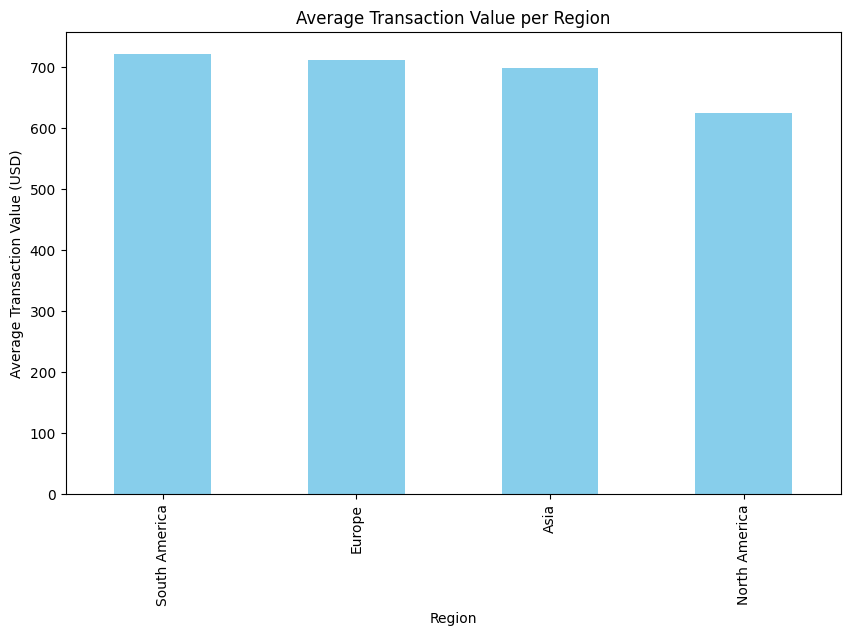

In [ ]:
# Average transaction value per region
avg_transaction_value_region = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
avg_transaction_value_region.plot(kind='bar', color='skyblue')
plt.title('Average Transaction Value per Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.show()


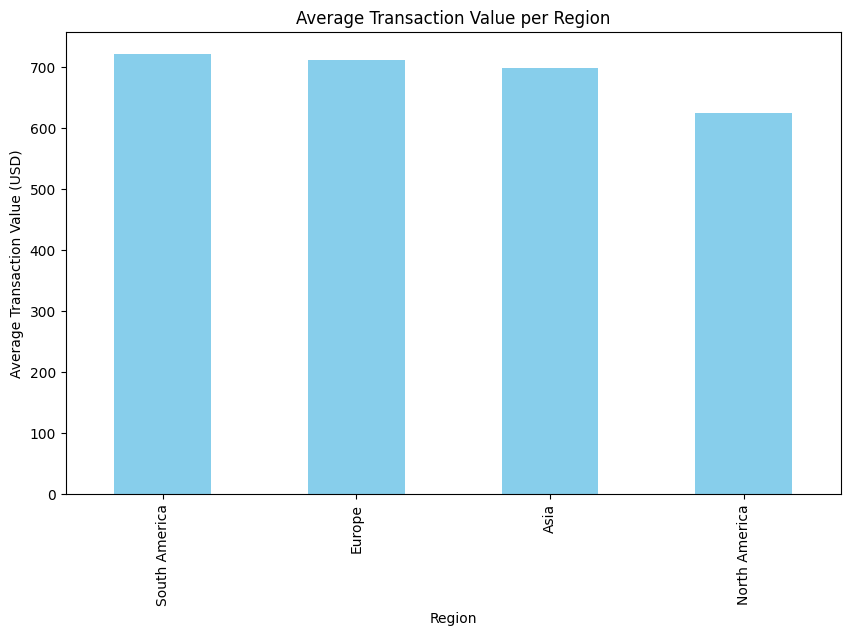

In [ ]:
# Average transaction value per region
avg_transaction_value_region = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
avg_transaction_value_region.plot(kind='bar', color='skyblue')
plt.title('Average Transaction Value per Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.show()


**Additional Analysis**

<ipython-input-34-1a7ba86530f2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='TotalValue', y='CustomerName', palette='magma')


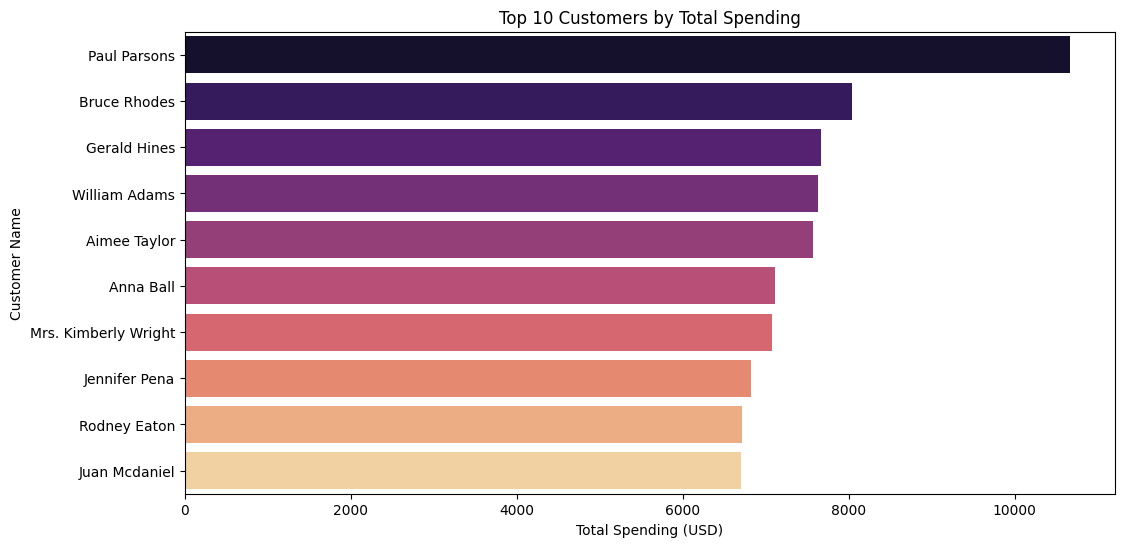

In [ ]:
# Total revenue per customer
customer_revenue = merged_data.groupby(['CustomerID', 'CustomerName'])['TotalValue'].sum().reset_index()

# Sort customers by revenue
top_customers = customer_revenue.sort_values('TotalValue', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_customers, x='TotalValue', y='CustomerName', palette='magma')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending (USD)')
plt.ylabel('Customer Name')
plt.show()


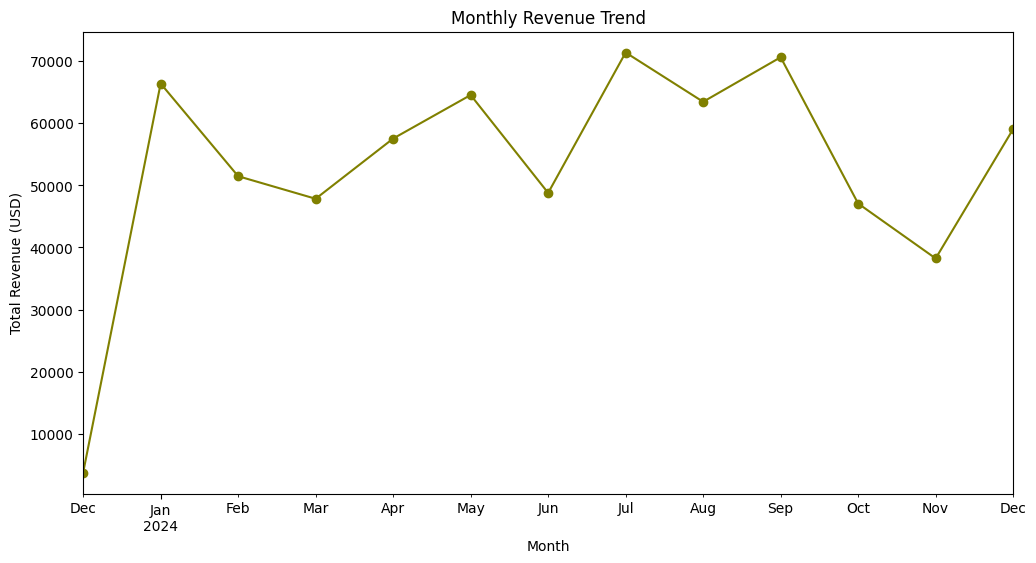

In [ ]:
# Add month column to dataframe
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')

# Total revenue per month
monthly_revenue = merged_data.groupby('TransactionMonth')['TotalValue'].sum()

# Plot
plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o', color='olive')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.show()


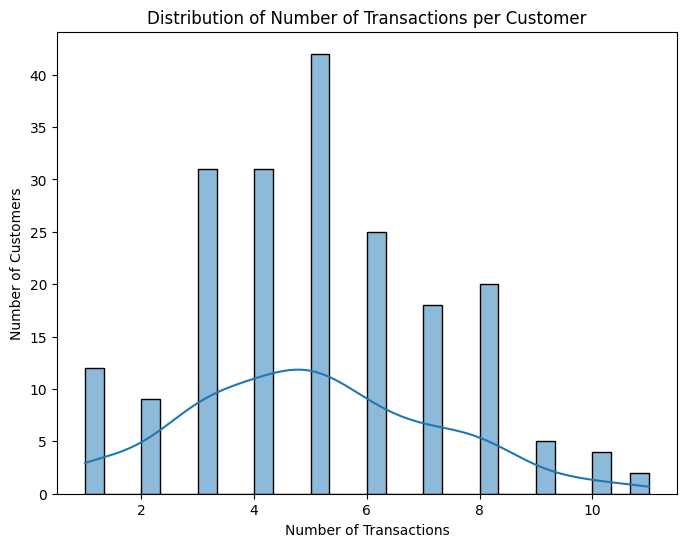

In [ ]:
# Number of transactions per customer
customer_transactions = merged_data.groupby('CustomerID')['TransactionID'].nunique().reset_index()
customer_transactions.rename(columns={'TransactionID': 'NumTransactions'}, inplace=True)

# Distribution of the number of transactions
plt.figure(figsize=(8,6))
sns.histplot(data=customer_transactions, x='NumTransactions', bins=30, kde=True)
plt.title('Distribution of Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
# Save the merged and prepared dataframe to a CSV file
merged_data.to_csv('eCommerce_Transactions_Analysis.csv', index=False)


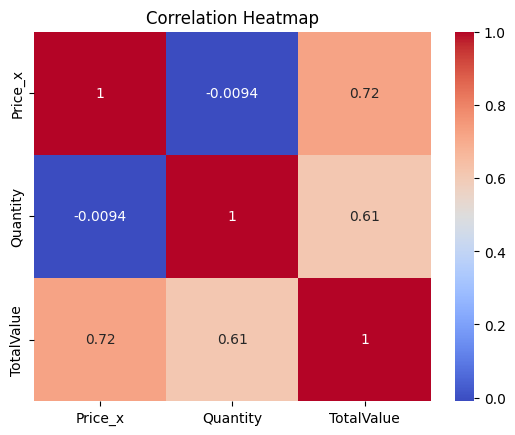

In [ ]:
# Correlation Heatmap
corr_matrix = merged_data[['Price_x', 'Quantity', 'TotalValue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

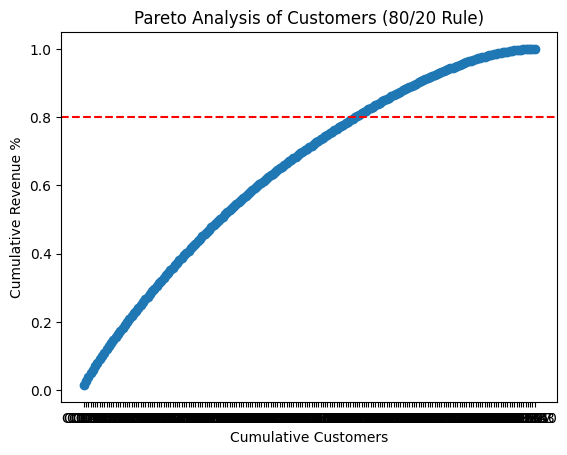

In [ ]:
# Pareto Analysis (80/20 Rule)
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
customer_revenue_cumsum = customer_revenue.cumsum() / customer_revenue.sum()
plt.plot(customer_revenue_cumsum, marker='o')
plt.axhline(0.8, color='red', linestyle='--')
plt.title('Pareto Analysis of Customers (80/20 Rule)')
plt.xlabel('Cumulative Customers')
plt.ylabel('Cumulative Revenue %')
plt.show()